In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
df = pd.DataFrame(pd.read_csv("full_data.csv"))
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [120]:
df.shape

(4981, 11)

In [121]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [122]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot: >

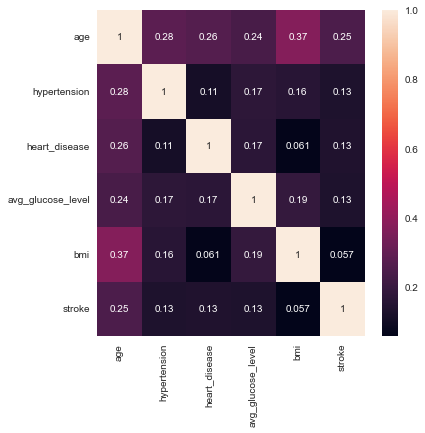

In [123]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

In [124]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot: xlabel='stroke', ylabel='count'>

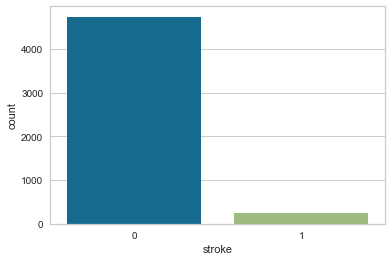

In [125]:
sns.countplot(x="stroke", data=df)

<AxesSubplot: xlabel='gender', ylabel='count'>

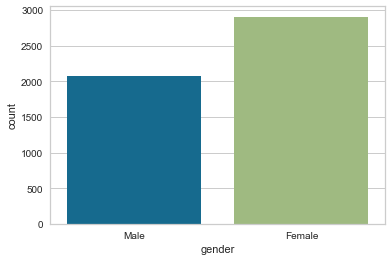

In [126]:
sns.countplot(x="gender", data=df)

<AxesSubplot: xlabel='heart_disease', ylabel='count'>

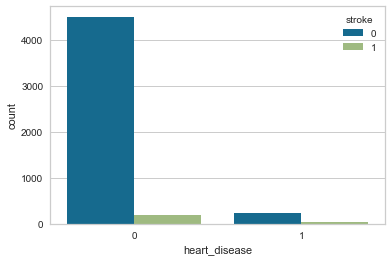

In [127]:
sns.countplot(data=df, x="heart_disease", hue="stroke")

<AxesSubplot: xlabel='gender', ylabel='count'>

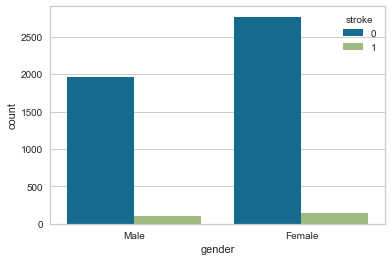

In [128]:
sns.countplot(data=df, x="gender", hue="stroke")

<AxesSubplot: xlabel='ever_married', ylabel='count'>

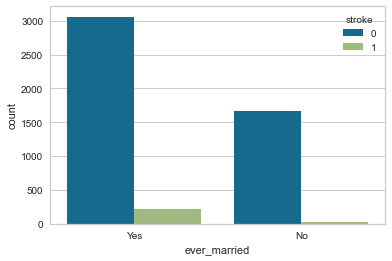

In [129]:
sns.countplot(data=df, x="ever_married", hue="stroke")

<AxesSubplot: xlabel='bmi', ylabel='Count'>

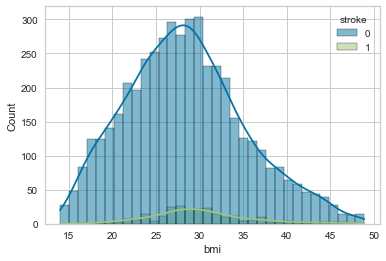

In [130]:
sns.histplot(data=df, x="bmi", hue="stroke", kde=True)

<AxesSubplot: xlabel='smoking_status', ylabel='count'>

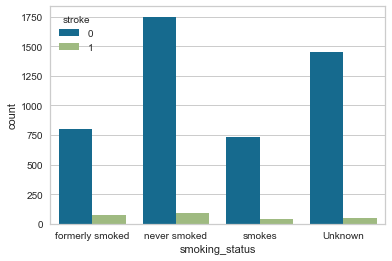

In [131]:
sns.countplot(data=df, x="smoking_status", hue="stroke")

<AxesSubplot: xlabel='hypertension', ylabel='count'>

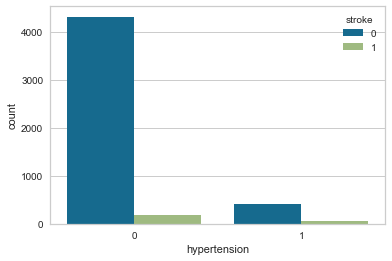

In [132]:
sns.countplot(data=df, x="hypertension", hue="stroke")

<AxesSubplot: xlabel='work_type', ylabel='count'>

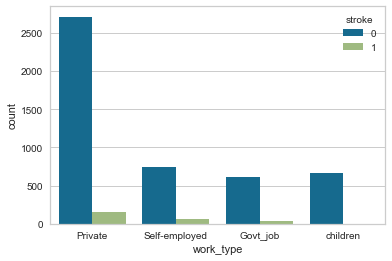

In [133]:
sns.countplot(data=df, x="work_type", hue="stroke")

<AxesSubplot: xlabel='Residence_type', ylabel='count'>

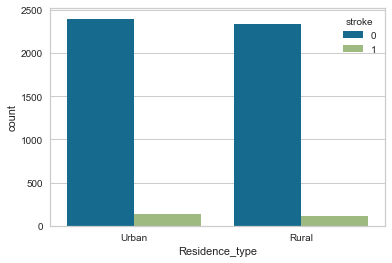

In [134]:
sns.countplot(data=df, x="Residence_type", hue="stroke")

<AxesSubplot: xlabel='bmi'>

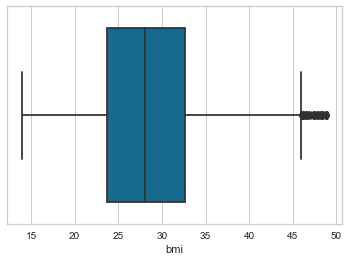

In [135]:
##finding outliers
sns.boxplot(data=df, x="bmi", hue="stroke")

<AxesSubplot: xlabel='age'>

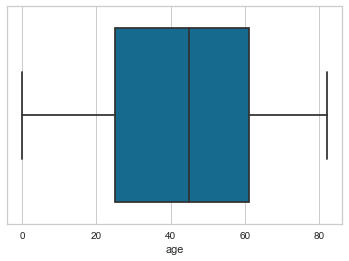

In [136]:
sns.boxplot(data=df, x="age", hue="stroke")

<AxesSubplot: xlabel='avg_glucose_level'>

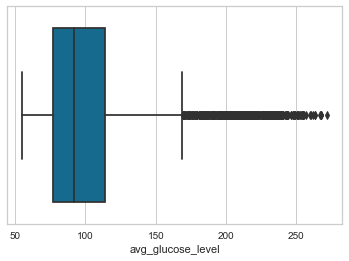

In [137]:
sns.boxplot(data=df, x="avg_glucose_level", hue="stroke")

<Figure size 720x720 with 0 Axes>

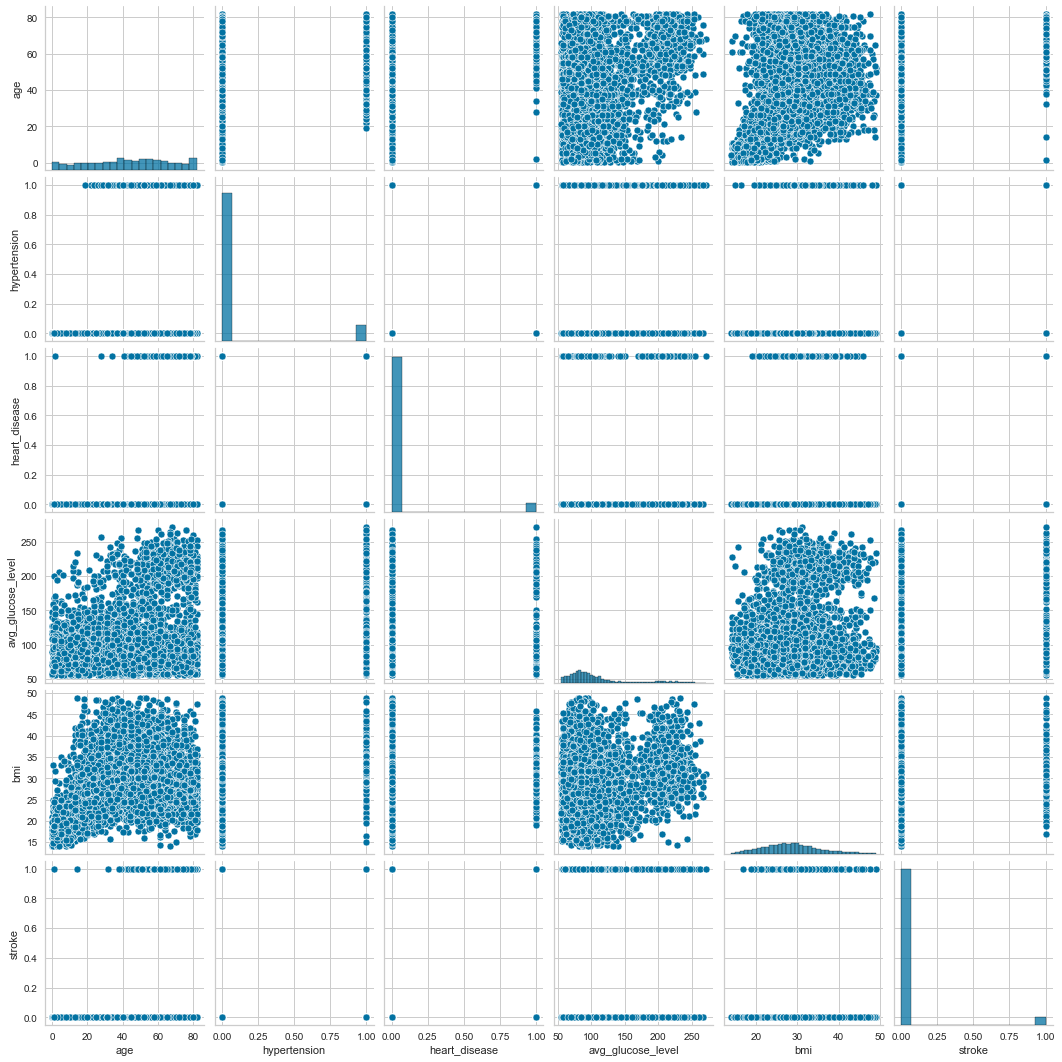

In [138]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [139]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [140]:
df["gender"] = l1.fit_transform(df["gender"])
df["ever_married"] = l1.fit_transform(df["ever_married"])
df["work_type"] = l1.fit_transform(df["work_type"])
df["Residence_type"] = l1.fit_transform(df["Residence_type"])
df["smoking_status"] = l1.fit_transform(df["smoking_status"])

In [141]:
x = df.drop('stroke',axis=1)
y = df ['stroke']

In [142]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all',random_state=1)
x_smt, y_smt = smt.fit_resample(x, y)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_smt = scaler.fit_transform(x_smt)

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smt,y_smt,test_size=0.3)

# ANN

In [145]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [146]:
tuner = kt.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    hyperband_iterations=1,
    seed=42,
    overwrite=True)

In [147]:
tuner.search(x=x_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             epochs=30)

Trial 90 Complete [00h 00m 11s]
val_accuracy: 0.9258266091346741

Best val_accuracy So Far: 0.9338695406913757
Total elapsed time: 00h 15m 11s
INFO:tensorflow:Oracle triggered exit


In [148]:
#Showing 10 best trials:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 416
units_1: 224
learning_rate: 0.0001
units_2: 192
units_3: 384
units_4: 32
units_5: 416
units_6: 64
units_7: 160
units_8: 416
units_9: 288
units_10: 512
units_11: 256
units_12: 288
units_13: 480
units_14: 288
units_15: 448
units_16: 160
units_17: 64
units_18: 320
units_19: 480
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0079
Score: 0.9338695406913757
Trial summary
Hyperparameters:
num_layers: 11
units_0: 96
units_1: 416
learning_rate: 0.0001
units_2: 288
units_3: 128
units_4: 256
units_5: 96
units_6: 384
units_7: 256
units_8: 288
units_9: 384
units_10: 352
units_11: 96
units_12: 32
units_13: 32
units_14: 192
units_15: 96
units_16: 416
units_17: 416
units_18: 480
units_19: 320
tuner/epochs: 30
tuner/initial_epoch: 10
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0047
Score: 0.930294930934906
Trial summary
Hyperparamet

In [149]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

model_hisotry = model.fit(x=x_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=30)

Epoch 1/30
140/140 [==============================] - 2s 6ms/step - loss: 0.4654 - accuracy: 0.8353 - val_loss: 0.2990 - val_accuracy: 0.8749
Epoch 2/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2841 - accuracy: 0.8843 - val_loss: 0.2702 - val_accuracy: 0.8990
Epoch 3/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2707 - accuracy: 0.8919 - val_loss: 0.2771 - val_accuracy: 0.8937
Epoch 4/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2568 - accuracy: 0.8970 - val_loss: 0.2492 - val_accuracy: 0.9062
Epoch 5/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2442 - accuracy: 0.9026 - val_loss: 0.2438 - val_accuracy: 0.9008
Epoch 6/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2349 - accuracy: 0.9075 - val_loss: 0.2359 - val_accuracy: 0.9142
Epoch 7/30
140/140 [==============================] - 1s 5ms/step - loss: 0.2285 - accuracy: 0.9093 - val_loss: 0.2337 - val_accuracy: 0.9097
Epoch 

In [150]:
val_acc_per_epoch = model_hisotry.history['val_loss']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch = ', best_epoch)

Best epoch =  17


In [151]:
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=x_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      epochs=best_epoch)

Epoch 1/17
140/140 [==============================] - 2s 6ms/step - loss: 0.4867 - accuracy: 0.7639 - val_loss: 0.2912 - val_accuracy: 0.8749
Epoch 2/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2842 - accuracy: 0.8852 - val_loss: 0.2740 - val_accuracy: 0.8963
Epoch 3/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2660 - accuracy: 0.8943 - val_loss: 0.2739 - val_accuracy: 0.8892
Epoch 4/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2529 - accuracy: 0.8999 - val_loss: 0.2471 - val_accuracy: 0.9053
Epoch 5/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2401 - accuracy: 0.9088 - val_loss: 0.2489 - val_accuracy: 0.9062
Epoch 6/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2337 - accuracy: 0.9088 - val_loss: 0.2396 - val_accuracy: 0.9044
Epoch 7/17
140/140 [==============================] - 1s 5ms/step - loss: 0.2246 - accuracy: 0.9124 - val_loss: 0.2250 - val_accuracy: 0.9223
Epoch 

In [152]:
from sklearn.metrics import classification_report
model_preds = final_model.predict(x_test)
for i in range(len(model_preds)):
    if model_preds[i] >= 0.5:
        model_preds[i] = 1
    elif model_preds[i] < 0.5:
        model_preds[i] = 0
        
ANN_classifier_report = classification_report(y_test, model_preds , output_dict=True, zero_division=1)
ANN_results = pd.DataFrame(ANN_classifier_report).transpose()

ANN_results



75/75 [==============================] - 0s 2ms/step


,precision,recall,f1-score,support
0,0.951745,0.847349,0.896518,1094.000000
1,0.882725,0.963957,0.921554,1304.000000
accuracy,0.910759,0.910759,0.910759,0.910759
macro avg,0.917235,0.905653,0.909036,2398.000000
weighted avg,0.914213,0.910759,0.910133,2398.000000


In [153]:
from sklearn.metrics import accuracy_score
ann_score = float(str(accuracy_score(y_test, model_preds) * 100)[:5])
ann_score

91.07

# Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB

In [155]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [156]:
prediction = naive_bayes.predict(x_test)

In [157]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
confusion

array([[ 854,  240],
       [ 127, 1177]], dtype=int64)

0.8469557964970809

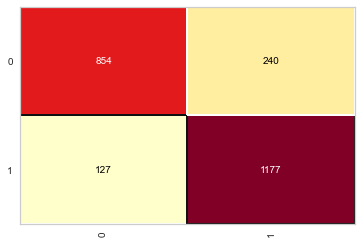

In [158]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)


In [159]:
classification_naive_gaussian = (classification_report(y_test, prediction))

In [160]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1094
           1       0.83      0.90      0.87      1304

    accuracy                           0.85      2398
   macro avg       0.85      0.84      0.84      2398
weighted avg       0.85      0.85      0.85      2398



In [161]:
from sklearn.metrics import accuracy_score
nb_score = float(str(accuracy_score(y_test, prediction) * 100)[:5])
nb_score


84.69

0.8469557964970809

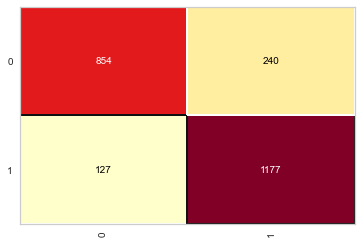

In [162]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [163]:
classification_naive_gaussian_standard = classification_report(y_test, prediction)

In [164]:
print(classification_naive_gaussian_standard)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1094
           1       0.83      0.90      0.87      1304

    accuracy                           0.85      2398
   macro avg       0.85      0.84      0.84      2398
weighted avg       0.85      0.85      0.85      2398



0.8469557964970809

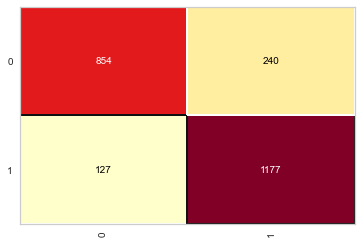

In [165]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [166]:
classification_naive_gaussian_minmax = classification_report(y_test, prediction)

In [167]:
print(classification_naive_gaussian_minmax)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1094
           1       0.83      0.90      0.87      1304

    accuracy                           0.85      2398
   macro avg       0.85      0.84      0.84      2398
weighted avg       0.85      0.85      0.85      2398



# Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="liblinear",random_state=0)

# fit the model with data
model=logreg.fit(x_train, y_train)

#y_pred = logreg.predict(x_test)
model

LogisticRegression(random_state=0, solver='liblinear')

In [169]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [170]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[ 892,  202],
       [ 105, 1199]], dtype=int64)

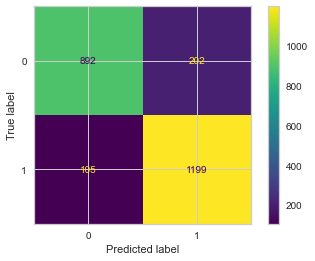

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

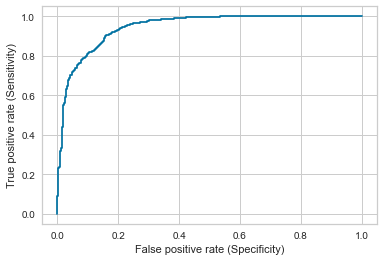

In [172]:
from sklearn.metrics import roc_curve
prob_predict = logreg.predict_proba(x_test)[::,1]

fpr , tpr ,_ = metrics.roc_curve(y_test,prob_predict)

#creating the roc curve
plt.plot(fpr,tpr)
plt.ylabel("True positive rate (Sensitivity)")
plt.xlabel("False positive rate (Specificity)")
plt.show()

In [173]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1094
           1       0.86      0.92      0.89      1304

    accuracy                           0.87      2398
   macro avg       0.88      0.87      0.87      2398
weighted avg       0.87      0.87      0.87      2398



In [174]:
from sklearn.metrics import accuracy_score
lr_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
lr_score

87.19

# KNN

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [176]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1094
           1       0.88      0.97      0.93      1304

    accuracy                           0.92      2398
   macro avg       0.92      0.91      0.91      2398
weighted avg       0.92      0.92      0.92      2398

Accuracy with K-NN: 91.58%


In [177]:
knn3 = precision
knn3

91.57631359466222

In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [179]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1094
           1       0.87      0.96      0.91      1304

    accuracy                           0.90      2398
   macro avg       0.91      0.89      0.90      2398
weighted avg       0.90      0.90      0.90      2398

Accuracy with K-NN: 89.78%


In [180]:
knn5 = precision
knn5

89.78315262718932

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [182]:
from sklearn.metrics import confusion_matrix, classification_report
y_valid_preds = knn.predict(x_test)
#Evaluation
precision = metrics.accuracy_score(y_test,y_valid_preds) * 100

print(classification_report(y_test,y_valid_preds))
print("Accuracy with K-NN: {0:.2f}%".format(precision))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1094
           1       0.86      0.94      0.90      1304

    accuracy                           0.88      2398
   macro avg       0.89      0.88      0.88      2398
weighted avg       0.89      0.88      0.88      2398

Accuracy with K-NN: 88.37%


In [183]:
knn10 = precision
knn10

88.36530442035028

# Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

scores = []
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

rfc_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
scores.append(('Random Forest Classification',rfc_score))
rfc_score

96.24

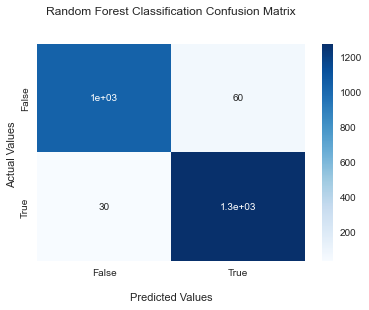

In [185]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Random Forest Classification Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [186]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1094
           1       0.96      0.98      0.97      1304

    accuracy                           0.96      2398
   macro avg       0.96      0.96      0.96      2398
weighted avg       0.96      0.96      0.96      2398



# CART - Decision Tree

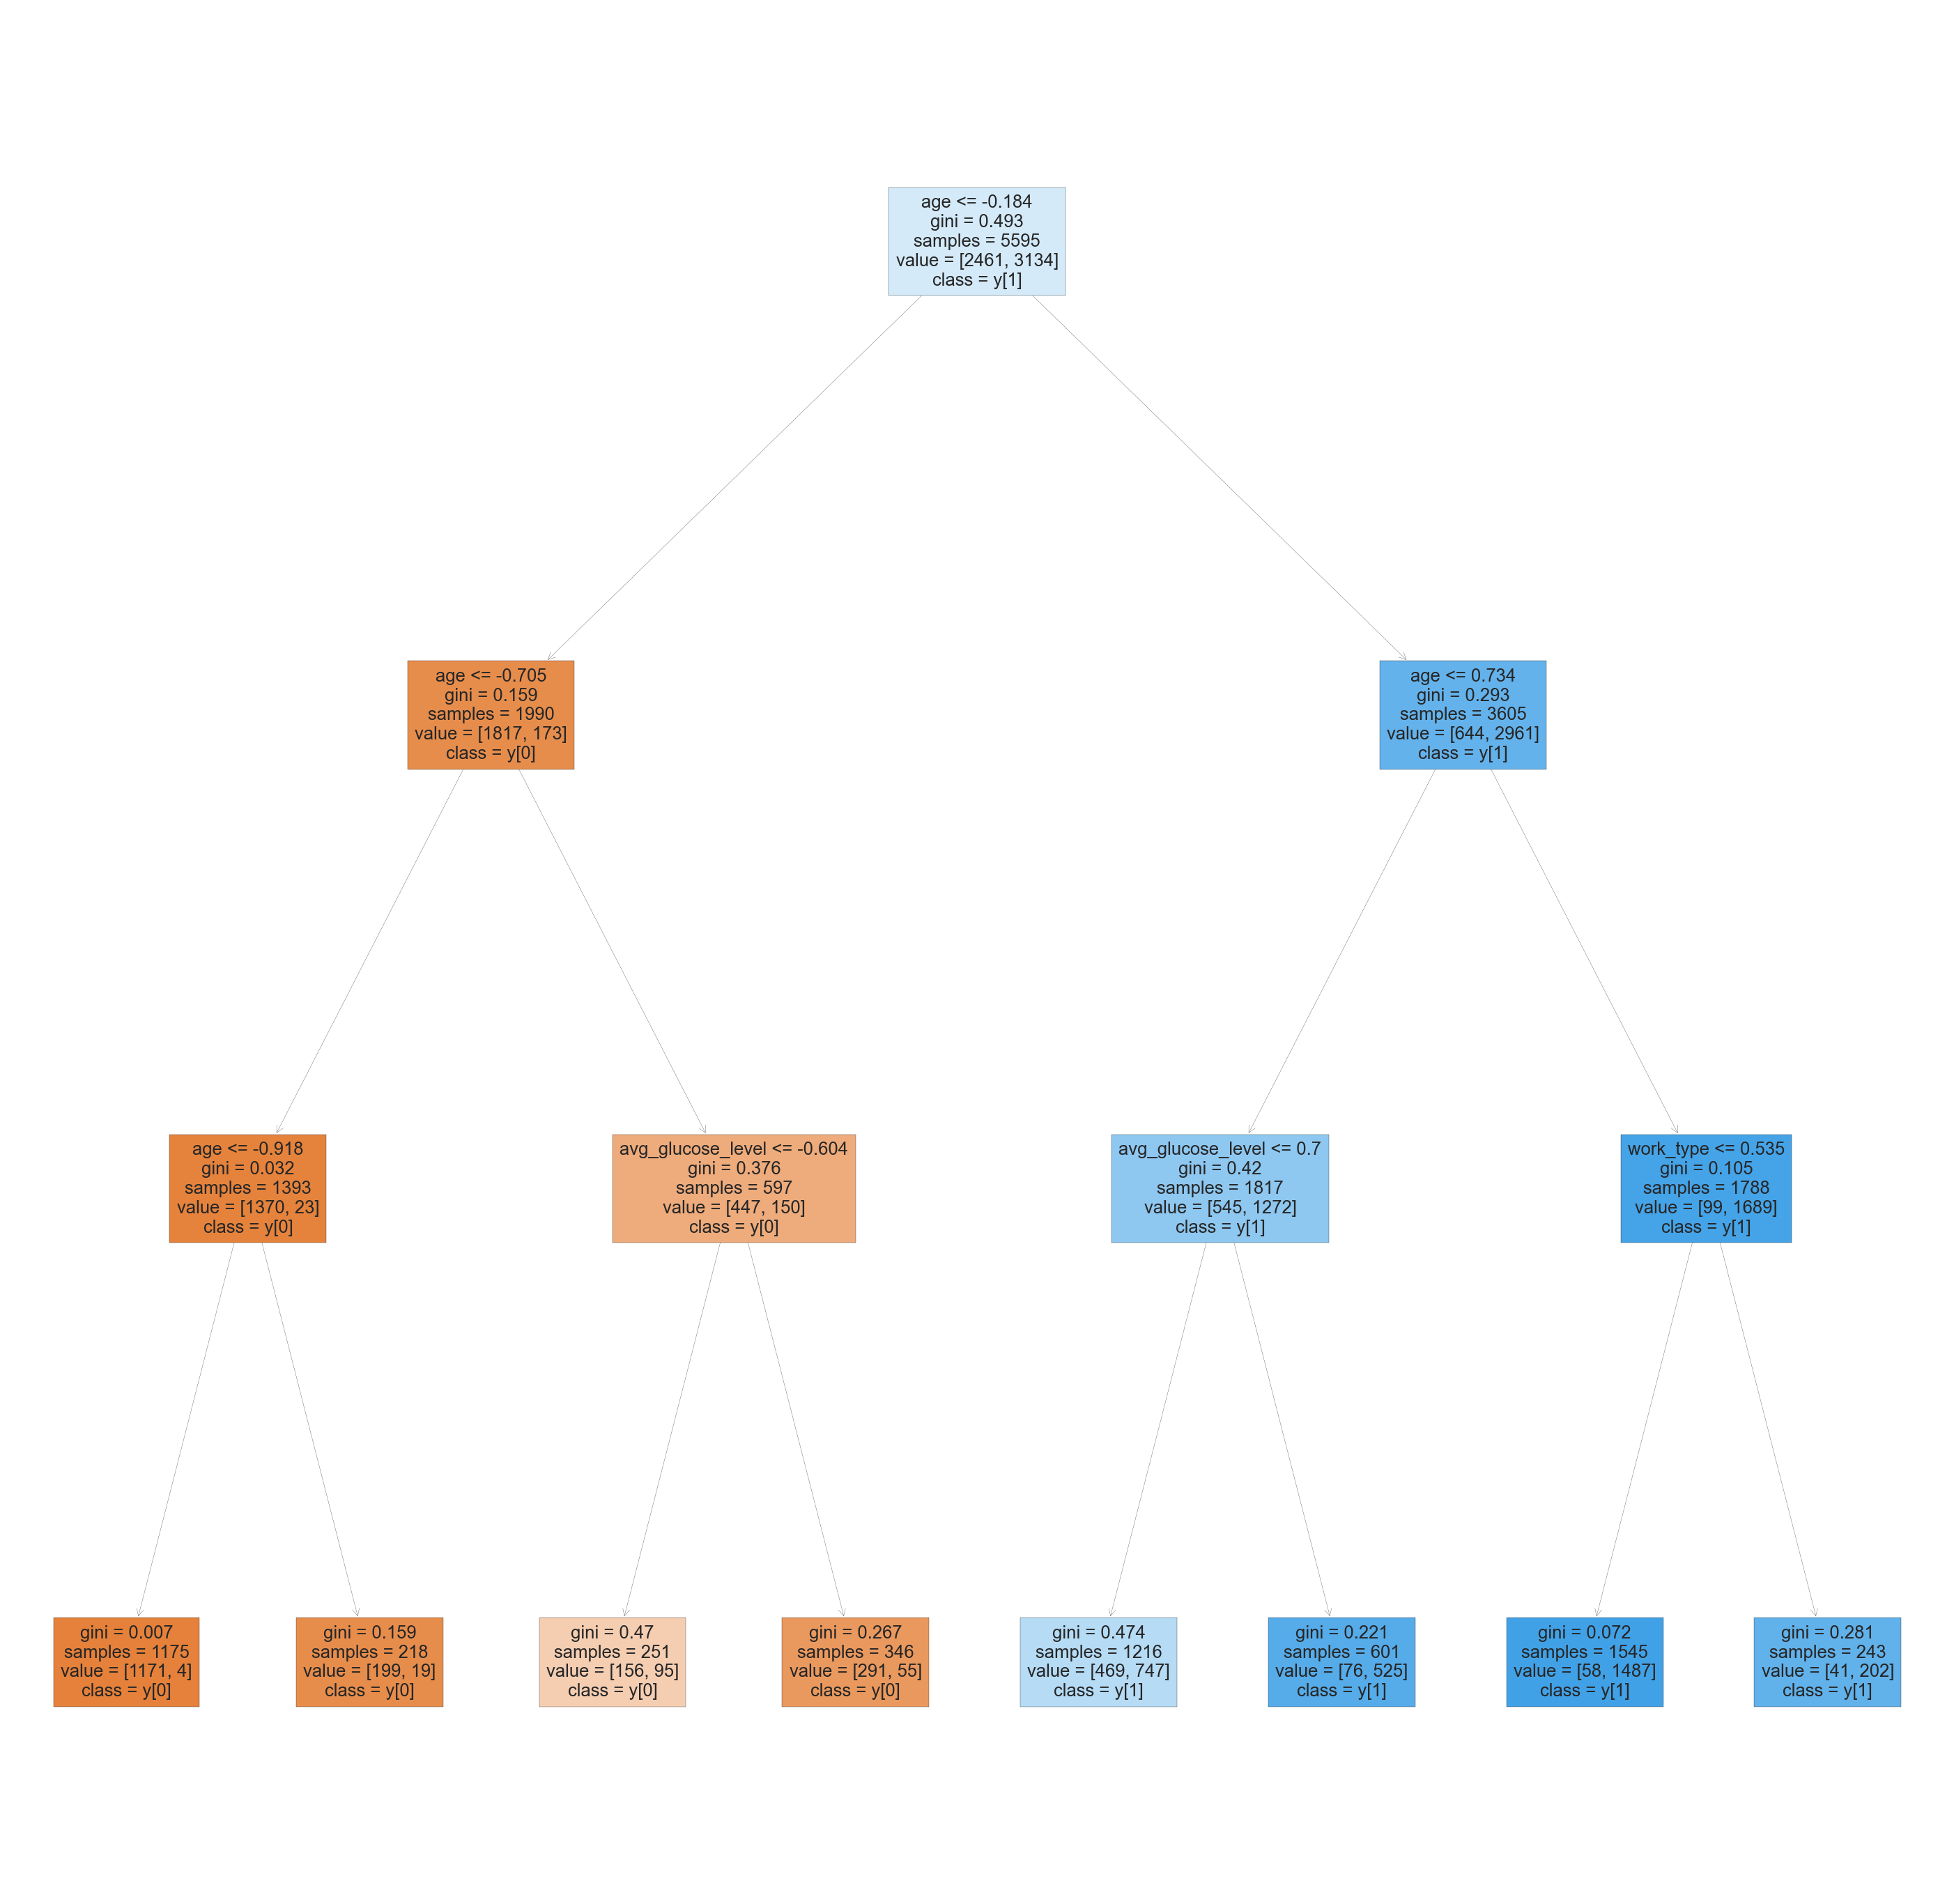

In [187]:
##CART Algorithm###
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
clf = clf.fit(x_train,y_train)
plt.figure(figsize=(50, 50))
#f=tree.plot_tree(clf,filled=True,class_names=True,feature_names=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])
f=tree.plot_tree(clf,filled=True,class_names=True,feature_names=df.columns[:-1])

In [188]:
predict = clf.predict(x_test)

In [189]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test,predict)
cnf_matrix

array([[ 799,  295],
       [  55, 1249]], dtype=int64)

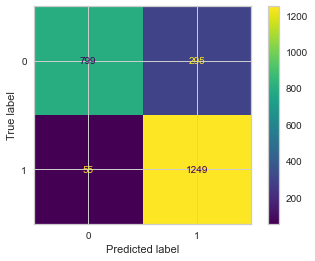

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

In [191]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1094
           1       0.81      0.96      0.88      1304

    accuracy                           0.85      2398
   macro avg       0.87      0.84      0.85      2398
weighted avg       0.87      0.85      0.85      2398



In [192]:
cart_score = float(str(accuracy_score(y_test, predict) * 100)[:5])
cart_score

85.4

# SVM

Accuracy:  89.53294412010008 %


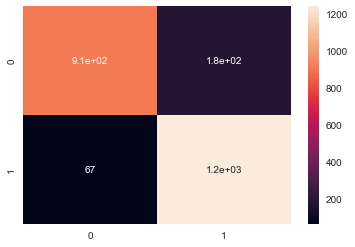

In [193]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(x_train, y_train)

y_test_pred = svc.predict(x_test)

# calculate statistics
accuracy_ = accuracy_score(y_test, y_test_pred)

print("Accuracy: ", accuracy_ * 100, "%")

sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

In [194]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1094
           1       0.87      0.95      0.91      1304

    accuracy                           0.90      2398
   macro avg       0.90      0.89      0.89      2398
weighted avg       0.90      0.90      0.89      2398



In [195]:
svc_score = float(str(accuracy_score(y_test, y_test_pred) * 100)[:5])
svc_score

89.53

# C5.0 - Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) 
clf.fit(x_train, y_train)
 
# Predict on training set
pred_y = clf.predict(x_train) 

# How's our Fbeta?
print('on train-set scores (over-fitting):')
print('test-set')
print('Fb: '+ str(metrics.fbeta_score(y_train, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_train, pred_y)) )
print('precision:' + str(metrics.precision_score(y_train, pred_y)) )
print()

# Predict on training set
pred_y = clf.predict(x_test)

# How's our Fbeta?
print('on test-set scores (very low):')
print('Fb: '+ str(metrics.fbeta_score(y_test, pred_y, beta=4)) )
print('recall:' + str(metrics.recall_score(y_test, pred_y)) )
print('precision:' + str(metrics.precision_score(y_test, pred_y)) )
print()

on train-set scores (over-fitting):
test-set
Fb: 1.0
recall:1.0
precision:1.0

on test-set scores (very low):
Fb: 0.9494640122511485
recall:0.950920245398773
precision:0.9267563527653214



In [204]:
y_pred = clf.predict(x_test)

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 996   98]
 [  64 1240]]


0.932443703085905

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1094
           1       0.93      0.95      0.94      1304

    accuracy                           0.93      2398
   macro avg       0.93      0.93      0.93      2398
weighted avg       0.93      0.93      0.93      2398



In [209]:
c5_score = float(str(accuracy_score(y_test, y_pred) * 100)[:5])
c5_score

93.24

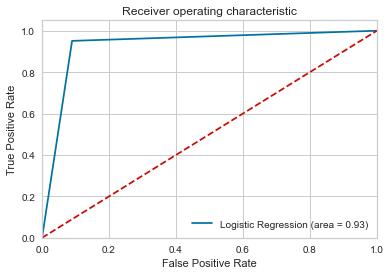

In [208]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Summary

In [210]:
dataA = [["Naive Bayes",nb_score],["KNN-3",knn3],["KNN-5",knn5],["KNN-10",knn10],["Random Forest Classifier",rfc_score],["Logistic Regression",lr_score],["CART",cart_score],["SVM",svc_score],["ANN",ann_score], ["C5.0",c5_score]]
dataA = pd.DataFrame(dataA, columns=["Algorithms","Accuracy"])
dataA

,Algorithms,Accuracy
0,Naive Bayes,84.690000
1,KNN-3,91.576314
2,KNN-5,89.783153
3,KNN-10,88.365304
4,Random Forest Classifier,96.240000
5,Logistic Regression,87.190000
6,CART,85.400000
7,SVM,89.530000
8,ANN,91.070000
9,C5.0,93.240000


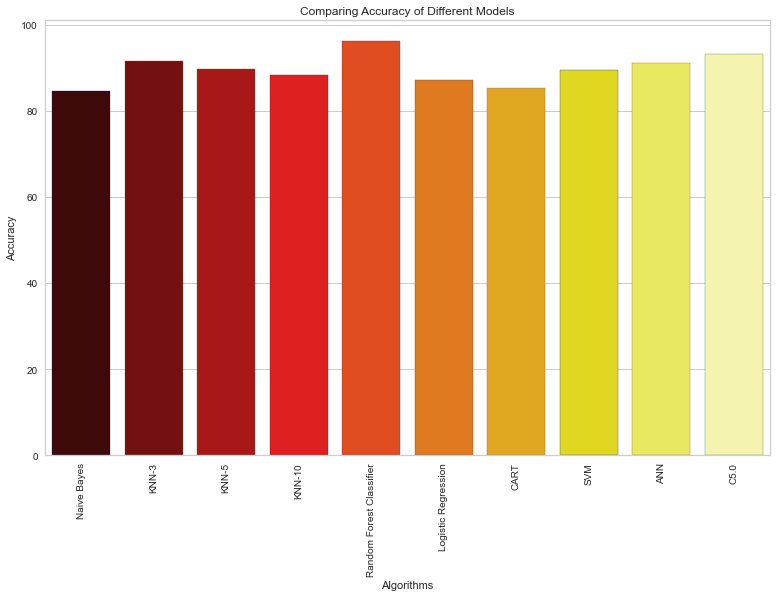

In [211]:
plt.subplots(figsize=(13,8))
sns.barplot(x="Algorithms", y="Accuracy", data=dataA,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing Accuracy of Different Models')
plt.show()